In [15]:
!pip install folium
!pip install BeautifulSoup4
!pip install geopy
! pip install geocoder

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from requests import get
import os
import geocoder
from geopy.geocoders import Nominatim


You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Running setup.py bdist_wheel for future: started
  Running setup.py bdist_wheel for future: finished with status 'done'
  Stored in directory: C:\Users\Vidarsh\AppData\Local\pip\Cache\wheels\0c\61\d2\d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future


You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [26]:
# Google Geolocation API key stored in Environment Variavle

os.environ["GOOGLE_API_KEY"] = "Your Google Geolocation API Key"

[23.0453269, 72.5596851]

Load the pincode data from excel file. It can be downloaded from Indian government Website.
Ahmedabad's pincode starts with 380XXX.

In [22]:
ahm_pincode=pd.read_excel(r"E:\Coursera\IBM\Capstone\India Census 2011\889C1810.xlsx",sheet_name="Sheet1")
ahm_pincode.head()

,Borough,Neighborhood,Postcode
0,Ahmadabad City,Ahmedabad G.P.O.,380001
1,Ahmadabad City,Lal Darwaja S.O,380001
2,Ahmadabad City,Raipur S.O (Ahmedabad),380001
3,Ahmadabad City,Gheekanta Road S.O,380001
4,Ahmadabad City,Manek Chowk S.O,380001


All the Neighborhoods are combined by similar pincodes

In [23]:
ahm_pincode=ahm_pincode.groupby(['Postcode','Borough'],as_index=False).agg(", ".join)
ahm_pincode.head(10)

,Postcode,Borough,Neighborhood
0,380001,Ahmadabad City,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ..."
1,380002,Ahmadabad City,"N C Market S.O, Revdibazar H.O, Railwaypura S.O"
2,380004,Ahmadabad City,"Sub Foreign S.O, Dudheshwar Tavdipura S.O, Gir..."
3,380005,Ahmadabad City,"Kabir Chowk S.O, Sabarmati S.O, O N G C S.O"
4,380006,Ahmadabad City,Ellisbridge S.O
5,380007,Ahmadabad City,"Sarkhej Road S.O, Anandnagar S.O (Ahmedabad), ..."
6,380008,Ahmadabad City,"Maninagar S.O, Daxini Society S.O, Khokhara Me..."
7,380009,Ahmadabad City,"Navrangpura H.O, Gujarat University S.O"
8,380013,Ahmadabad City,"Vadaj S.O, Naranpura Vistar S.O, Stadium Marg ..."
9,380014,Ahmadabad City,Navjivan S.O


In [24]:
ahm_pincode.shape

(46, 3)

Get geolocation of each pincode using geocoder package.

In [51]:
for i in range(len(ahm_pincode)):
    geo = geocoder.google(ahm_pincode.loc[i,"Postcode"])
    ahm_pincode.loc[i,"Latitude"]=geo.lat
    ahm_pincode.loc[i,"Longitude"]=geo.lng
    

In [52]:
ahm_pincode.head(10)

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,380001,Ahmadabad City,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",23.026426,72.584341
1,380002,Ahmadabad City,"N C Market S.O, Revdibazar H.O, Railwaypura S.O",23.009487,72.599248
2,380004,Ahmadabad City,"Sub Foreign S.O, Dudheshwar Tavdipura S.O, Gir...",23.054391,72.590547
3,380005,Ahmadabad City,"Kabir Chowk S.O, Sabarmati S.O, O N G C S.O",23.088705,72.591093
4,380006,Ahmadabad City,Ellisbridge S.O,23.019748,72.554644
5,380007,Ahmadabad City,"Sarkhej Road S.O, Anandnagar S.O (Ahmedabad), ...",23.004475,72.553115
6,380008,Ahmadabad City,"Maninagar S.O, Daxini Society S.O, Khokhara Me...",22.998450,72.611194
7,380009,Ahmadabad City,"Navrangpura H.O, Gujarat University S.O",23.031459,72.564108
8,380013,Ahmadabad City,"Vadaj S.O, Naranpura Vistar S.O, Stadium Marg ...",23.059938,72.561246
9,380014,Ahmadabad City,Navjivan S.O,23.045327,72.559685


In [55]:
geo = geocoder.google("Ahemdabad, Gujarat")

latitude = geo.lat
longitude = geo.lng
print('The geograpical coordinate of Ahmedabad are {}, {}.'.format( latitude, longitude))

The geograpical coordinate of Ahmedabad are 23.022505, 72.5713621.


In [216]:
map_ahmedabad = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(ahm_pincode['Latitude'], ahm_pincode['Longitude'], ahm_pincode['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ahmedabad)  
    
map_ahmedabad

Removing the pincodes outside Ahemdabad City.

In [157]:
df_ahm=ahm_pincode[ahm_pincode["Borough"].str.contains("Ahmadabad City")].reset_index(drop=True)
df_ahm.head(10)


,Postcode,Borough,Neighborhood,Latitude,Longitude
0,380001,Ahmadabad City,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",23.026426,72.584341
1,380002,Ahmadabad City,"N C Market S.O, Revdibazar H.O, Railwaypura S.O",23.009487,72.599248
2,380004,Ahmadabad City,"Sub Foreign S.O, Dudheshwar Tavdipura S.O, Gir...",23.054391,72.590547
3,380005,Ahmadabad City,"Kabir Chowk S.O, Sabarmati S.O, O N G C S.O",23.088705,72.591093
4,380006,Ahmadabad City,Ellisbridge S.O,23.019748,72.554644
5,380007,Ahmadabad City,"Sarkhej Road S.O, Anandnagar S.O (Ahmedabad), ...",23.004475,72.553115
6,380008,Ahmadabad City,"Maninagar S.O, Daxini Society S.O, Khokhara Me...",22.998450,72.611194
7,380009,Ahmadabad City,"Navrangpura H.O, Gujarat University S.O",23.031459,72.564108
8,380013,Ahmadabad City,"Vadaj S.O, Naranpura Vistar S.O, Stadium Marg ...",23.059938,72.561246
9,380014,Ahmadabad City,Navjivan S.O,23.045327,72.559685


In [158]:
df_ahm.shape

(29, 5)

In [63]:
map_ahmedabad_only = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_ahm['Latitude'], df_ahm['Longitude'], df_ahm['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ahmedabad_only)  
    
map_ahmedabad_only

In [64]:
CLIENT_ID = 'XYZ' # your Foursquare ID
CLIENT_SECRET = 'ABC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [69]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [170]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,dinnerknock,Indian Restaurant,23.009438,72.62377


In [171]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

1 venues were returned by Foursquare.


In [164]:
def getNearbyVenues(names, latitudes, longitudes, radius=1100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [165]:

Ahmedabad_venues = getNearbyVenues(names=df_ahm['Neighborhood'],
                                   latitudes=df_ahm['Latitude'],
                                   longitudes=df_ahm['Longitude']
                                  )

Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O (Ahmedabad), Gheekanta Road S.O, Manek Chowk S.O, Dariapur S.O (Ahmedabad), Gandhi Road S.O (Ahmedabad), Khadia S.O, Raikhad S.O, District Court S.O (Ahmedabad), Khanpur S.O (Ahmedabad), Jamalpur S.O (Ahmedabad), Municipal Corporation S.O
N C Market S.O, Revdibazar H.O, Railwaypura S.O
Sub Foreign S.O, Dudheshwar Tavdipura S.O, Girdharnagar S.O, Cantonment S.O, Delhi Gate S.O (Ahmedabad), Shahpur S.O (Ahmedabad), Madhupura Market S.O, Shahibag S.O
Kabir Chowk S.O, Sabarmati S.O, O N G C S.O
Ellisbridge S.O
Sarkhej Road S.O, Anandnagar S.O (Ahmedabad), Shardanagar S.O, Narayannagar S.O, Paldi S.O (Ahmedabad)
Maninagar S.O, Daxini Society S.O, Khokhara Mehmadabad S.O, L G Hospital S.O, Vasisthnagar S.O, Jawahar Chowk S.O, S A Mills S.O
Navrangpura H.O, Gujarat University S.O
Vadaj S.O, Naranpura Vistar S.O, Stadium Marg S.O, Shastrinagar S.O (Ahmedabad), Nava Vadaj S.O
Navjivan S.O
Jodhpur Char Rasta S.O, Azad Society S.O, I I M S.O, Polytech

In [167]:
print(Ahmedabad_venues.shape)
Ahmedabad_venues.head()

(360, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",23.026426,72.584341,Manek Chowk Khau Gali,23.023505,72.588539,Snack Place
1,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",23.026426,72.584341,Manek Chowk,23.023626,72.588553,Fast Food Restaurant
2,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",23.026426,72.584341,Lucky Tea,23.027829,72.581394,Tea Room
3,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",23.026426,72.584341,Agashiye,23.027104,72.581614,Indian Restaurant
4,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",23.026426,72.584341,House of MG,23.027186,72.581621,Hotel


In [168]:
len(Ahmedabad_venues.Neighborhood.unique())

29

In [172]:
Ahmedabad_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O (Ahmedabad), Gheekanta Road S.O, Manek Chowk S.O, Dariapur S.O (Ahmedabad), Gandhi Road S.O (Ahmedabad), Khadia S.O, Raikhad S.O, District Court S.O (Ahmedabad), Khanpur S.O (Ahmedabad), Jamalpur S.O (Ahmedabad), Municipal Corporation S.O",13,13,13,13,13,13
"Amraiwadi S.O, Ctm Char Rasta S.O",6,6,6,6,6,6
"Asarwa Ext South S.O, I E Bapunagar S.O, Bapunagar S.O",5,5,5,5,5,5
"Bodakdev S.O, Thaltej Road S.O",12,12,12,12,12,12
"Calico Mills S.O, M D Marg S.O, Behrampura S.O, Gita Mandir Road S.O",2,2,2,2,2,2
"D Cabin S.O, Railway Colony S.O (Ahmedabad)",6,6,6,6,6,6
Ellisbridge S.O,39,39,39,39,39,39
Gandhi Ashram S.O (Ahmedabad),11,11,11,11,11,11
Ghatlodia S.O,6,6,6,6,6,6


In [173]:
print('There are {} uniques categories.'.format(len(Ahmedabad_venues['Venue Category'].unique())))

There are 95 uniques categories.


In [174]:
# one hot encoding
ahm_onehot = pd.get_dummies(Ahmedabad_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ahm_onehot['Neighborhood_names'] = Ahmedabad_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ahm_onehot.columns[-1]] + list(ahm_onehot.columns[:-1])
ahm_onehot = ahm_onehot[fixed_columns]
ahm_onehot.head()

,Neighborhood_names,ATM,Accessories Store,Arcade,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Basketball Court,Bistro,...,Supermarket,Tea Room,Tennis Court,Theater,Train Station,Vegetarian / Vegan Restaurant,Video Store,Women's Store,Yoga Studio,Zoo
0,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
ahm_onehot.shape

(360, 96)

In [176]:
ahm_grouped = ahm_onehot.groupby('Neighborhood_names').mean().reset_index()
ahm_grouped.head()

,Neighborhood_names,ATM,Accessories Store,Arcade,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Basketball Court,Bistro,...,Supermarket,Tea Room,Tennis Court,Theater,Train Station,Vegetarian / Vegan Restaurant,Video Store,Women's Store,Yoga Studio,Zoo
0,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.076923,0.000000,0.0,0.0,0.076923,0.0,0.0,0.0,0.0
1,"Amraiwadi S.O, Ctm Char Rasta S.O",0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,"Asarwa Ext South S.O, I E Bapunagar S.O, Bapun...",0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,"Bodakdev S.O, Thaltej Road S.O",0.0,0.0,0.0,0.0,0.0,0.083333,0.083333,0.0,0.0,...,0.0,0.000000,0.083333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,"Calico Mills S.O, M D Marg S.O, Behrampura S.O...",0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [177]:
ahm_grouped.shape

(29, 96)

In [178]:
num_top_venues = 5

for hood in ahm_grouped['Neighborhood_names']:
    print("----"+hood+"----")
    temp = ahm_grouped[ahm_grouped['Neighborhood_names'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O (Ahmedabad), Gheekanta Road S.O, Manek Chowk S.O, Dariapur S.O (Ahmedabad), Gandhi Road S.O (Ahmedabad), Khadia S.O, Raikhad S.O, District Court S.O (Ahmedabad), Khanpur S.O (Ahmedabad), Jamalpur S.O (Ahmedabad), Municipal Corporation S.O----
                           venue  freq
0                          Hotel  0.31
1                  Historic Site  0.15
2              Indian Restaurant  0.15
3  Vegetarian / Vegan Restaurant  0.08
4                       Tea Room  0.08


----Amraiwadi S.O, Ctm Char Rasta S.O----
               venue  freq
0          Pool Hall  0.17
1        IT Services  0.17
2      Moving Target  0.17
3  Indian Restaurant  0.17
4            Brewery  0.17


----Asarwa Ext South S.O, I E Bapunagar S.O, Bapunagar S.O----
               venue  freq
0     Clothing Store   0.2
1  Indian Restaurant   0.2
2       Gourmet Shop   0.2
3      Movie Theater   0.2
4        Bridal Shop   0.2


----Bodakdev S.O, Thaltej Road S.O----

In [179]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [180]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood_names']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood_names'] = ahm_grouped['Neighborhood_names']

for ind in np.arange(ahm_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ahm_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood_names,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",Hotel,Historic Site,Indian Restaurant,Tea Room,Fast Food Restaurant,Snack Place,Park,Vegetarian / Vegan Restaurant,Falafel Restaurant,Cricket Ground
1,"Amraiwadi S.O, Ctm Char Rasta S.O",Brewery,Health Food Store,Moving Target,Pool Hall,IT Services,Indian Restaurant,Event Space,Cricket Ground,Department Store,Dessert Shop
2,"Asarwa Ext South S.O, I E Bapunagar S.O, Bapun...",Bridal Shop,Gourmet Shop,Clothing Store,Movie Theater,Indian Restaurant,Zoo,Cricket Ground,Department Store,Dessert Shop,Dim Sum Restaurant
3,"Bodakdev S.O, Thaltej Road S.O",Hotel,Indian Restaurant,Fast Food Restaurant,Event Space,Clothing Store,BBQ Joint,Tennis Court,Bakery,Café,Sandwich Place
4,"Calico Mills S.O, M D Marg S.O, Behrampura S.O...",Cafeteria,Boat or Ferry,Zoo,Falafel Restaurant,Cricket Ground,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop


In [181]:
ahm_grouped_clustering = ahm_grouped.drop('Neighborhood_names', 1)


In [188]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k,random_state=0)
    km = km.fit(ahm_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

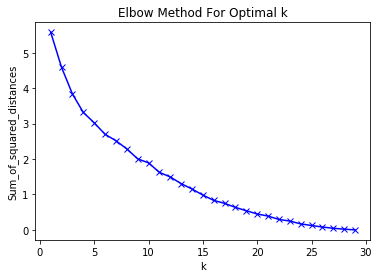

In [185]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [189]:
kclusters = 12

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ahm_grouped_clustering)

In [190]:
kmeans.labels_

array([ 3,  3,  3,  3,  0,  5,  3,  1,  9,  7,  4,  1,  8, 11,  3,  9,  3,
        1,  3,  3,  1,  2,  3,  9,  6,  9,  3, 10,  9])

In [191]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [192]:
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood_names,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",Hotel,Historic Site,Indian Restaurant,Tea Room,Fast Food Restaurant,Snack Place,Park,Vegetarian / Vegan Restaurant,Falafel Restaurant,Cricket Ground
1,3,"Amraiwadi S.O, Ctm Char Rasta S.O",Brewery,Health Food Store,Moving Target,Pool Hall,IT Services,Indian Restaurant,Event Space,Cricket Ground,Department Store,Dessert Shop
2,3,"Asarwa Ext South S.O, I E Bapunagar S.O, Bapun...",Bridal Shop,Gourmet Shop,Clothing Store,Movie Theater,Indian Restaurant,Zoo,Cricket Ground,Department Store,Dessert Shop,Dim Sum Restaurant
3,3,"Bodakdev S.O, Thaltej Road S.O",Hotel,Indian Restaurant,Fast Food Restaurant,Event Space,Clothing Store,BBQ Joint,Tennis Court,Bakery,Café,Sandwich Place
4,0,"Calico Mills S.O, M D Marg S.O, Behrampura S.O...",Cafeteria,Boat or Ferry,Zoo,Falafel Restaurant,Cricket Ground,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop
5,5,"D Cabin S.O, Railway Colony S.O (Ahmedabad)",Ice Cream Shop,Pizza Place,Bus Station,Farmers Market,Zoo,Electronics Store,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop
6,3,Ellisbridge S.O,Fast Food Restaurant,Café,Indian Restaurant,Shopping Mall,Tea Room,Park,Pizza Place,Mexican Restaurant,Restaurant,Arts & Crafts Store
7,1,Gandhi Ashram S.O (Ahmedabad),Furniture / Home Store,Pizza Place,Sculpture Garden,Indie Movie Theater,Indian Restaurant,Hotel Bar,Fast Food Restaurant,History Museum,Vegetarian / Vegan Restaurant,Garden
8,9,Ghatlodia S.O,Indian Restaurant,Pizza Place,Arts & Crafts Store,Café,Ice Cream Shop,Zoo,Event Space,Cricket Ground,Department Store,Dessert Shop
9,7,Ghodasar S.O (Ahmedabad),ATM,Pizza Place,Motorcycle Shop,Indian Restaurant,Event Space,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop,Dim Sum Restaurant


In [193]:
ahm_merged = df_ahm
ahm_merged.columns=["Postcode","Borough","Neighborhood_names","Latitude","Longitude"]
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ahm_merged = ahm_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood_names'), on='Neighborhood_names')

ahm_merged # check the last columns!

,Postcode,Borough,Neighborhood_names,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,380001,Ahmadabad City,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",23.026426,72.584341,3,Hotel,Historic Site,Indian Restaurant,Tea Room,Fast Food Restaurant,Snack Place,Park,Vegetarian / Vegan Restaurant,Falafel Restaurant,Cricket Ground
1,380002,Ahmadabad City,"N C Market S.O, Revdibazar H.O, Railwaypura S.O",23.009487,72.599248,1,Shopping Mall,Zoo,Fast Food Restaurant,Sandwich Place,Bus Station,Burger Joint,Multiplex,Sports Club,Clothing Store,Farmers Market
2,380004,Ahmadabad City,"Sub Foreign S.O, Dudheshwar Tavdipura S.O, Gir...",23.054391,72.590547,3,Museum,Garden,Furniture / Home Store,History Museum,Pizza Place,Bakery,Ice Cream Shop,Indian Restaurant,Electronics Store,Cosmetics Shop
3,380005,Ahmadabad City,"Kabir Chowk S.O, Sabarmati S.O, O N G C S.O",23.088705,72.591093,11,Multiplex,Sandwich Place,Cricket Ground,Fast Food Restaurant,Zoo,Electronics Store,Cosmetics Shop,Department Store,Dessert Shop,Dim Sum Restaurant
4,380006,Ahmadabad City,Ellisbridge S.O,23.019748,72.554644,3,Fast Food Restaurant,Café,Indian Restaurant,Shopping Mall,Tea Room,Park,Pizza Place,Mexican Restaurant,Restaurant,Arts & Crafts Store
5,380007,Ahmadabad City,"Sarkhej Road S.O, Anandnagar S.O (Ahmedabad), ...",23.004475,72.553115,9,Pizza Place,Hotel,Ice Cream Shop,Indian Restaurant,Coffee Shop,Snack Place,Zoo,Electronics Store,Cosmetics Shop,Cricket Ground
6,380008,Ahmadabad City,"Maninagar S.O, Daxini Society S.O, Khokhara Me...",22.998450,72.611194,3,Fast Food Restaurant,Indian Restaurant,Tennis Court,Pizza Place,Electronics Store,Ice Cream Shop,Clothing Store,Train Station,Accessories Store,Fried Chicken Joint
7,380009,Ahmadabad City,"Navrangpura H.O, Gujarat University S.O",23.031459,72.564108,3,Indian Restaurant,Hotel,Fast Food Restaurant,Café,Snack Place,Dessert Shop,Coffee Shop,Tea Room,Pizza Place,Sandwich Place
8,380013,Ahmadabad City,"Vadaj S.O, Naranpura Vistar S.O, Stadium Marg ...",23.059938,72.561246,9,Indian Restaurant,Sandwich Place,Pizza Place,Gym,Bus Station,Ice Cream Shop,Dessert Shop,Fast Food Restaurant,Food Court,Vegetarian / Vegan Restaurant
9,380014,Ahmadabad City,Navjivan S.O,23.045327,72.559685,3,Café,Indian Restaurant,Asian Restaurant,Pizza Place,Ice Cream Shop,Cricket Ground,Dessert Shop,Bistro,Hotel,Gym


In [194]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ahm_merged['Latitude'], ahm_merged['Longitude'], ahm_merged['Neighborhood_names'], ahm_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 1

In [203]:
ahm_merged.loc[ahm_merged['Cluster Labels'] == 0, ahm_merged.columns[[0,2] + list(range(5, ahm_merged.shape[1]))]]

,Postcode,Neighborhood_names,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,380022,"Calico Mills S.O, M D Marg S.O, Behrampura S.O...",0,Cafeteria,Boat or Ferry,Zoo,Falafel Restaurant,Cricket Ground,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop


Cluster 2

In [202]:
ahm_merged.loc[ahm_merged['Cluster Labels'] == 1, ahm_merged.columns[[0,2] + list(range(5, ahm_merged.shape[1]))]]

,Postcode,Neighborhood_names,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,380002,"N C Market S.O, Revdibazar H.O, Railwaypura S.O",1,Shopping Mall,Zoo,Fast Food Restaurant,Sandwich Place,Bus Station,Burger Joint,Multiplex,Sports Club,Clothing Store,Farmers Market
10,380015,"Jodhpur Char Rasta S.O, Azad Society S.O, I I ...",1,Café,Clothing Store,Fast Food Restaurant,Snack Place,Coffee Shop,Mexican Restaurant,Pizza Place,Sandwich Place,Shopping Mall,Multiplex
19,380027,Gandhi Ashram S.O (Ahmedabad),1,Furniture / Home Store,Pizza Place,Sculpture Garden,Indie Movie Theater,Indian Restaurant,Hotel Bar,Fast Food Restaurant,History Museum,Vegetarian / Vegan Restaurant,Garden
21,380049,Nikol S.O,1,Chinese Restaurant,Food Court,Café,Noodle House,Vegetarian / Vegan Restaurant,BBQ Joint,Dim Sum Restaurant,Hostel,Snack Place,Korean Restaurant


Cluster 3

In [205]:
ahm_merged.loc[ahm_merged['Cluster Labels'] == 2, ahm_merged.columns[[0,2] + list(range(5, ahm_merged.shape[1]))]]

,Postcode,Neighborhood_names,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,380021,"Rajpur Gomtipur S.O, Gomtipur S.O",2,Indian Restaurant,Zoo,Falafel Restaurant,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop


Cluster 4

In [206]:
ahm_merged.loc[ahm_merged['Cluster Labels'] == 3, ahm_merged.columns[[0,2] + list(range(5, ahm_merged.shape[1]))]]

,Postcode,Neighborhood_names,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,380001,"Ahmedabad G.P.O., Lal Darwaja S.O, Raipur S.O ...",3,Hotel,Historic Site,Indian Restaurant,Tea Room,Fast Food Restaurant,Snack Place,Park,Vegetarian / Vegan Restaurant,Falafel Restaurant,Cricket Ground
2,380004,"Sub Foreign S.O, Dudheshwar Tavdipura S.O, Gir...",3,Museum,Garden,Furniture / Home Store,History Museum,Pizza Place,Bakery,Ice Cream Shop,Indian Restaurant,Electronics Store,Cosmetics Shop
4,380006,Ellisbridge S.O,3,Fast Food Restaurant,Café,Indian Restaurant,Shopping Mall,Tea Room,Park,Pizza Place,Mexican Restaurant,Restaurant,Arts & Crafts Store
6,380008,"Maninagar S.O, Daxini Society S.O, Khokhara Me...",3,Fast Food Restaurant,Indian Restaurant,Tennis Court,Pizza Place,Electronics Store,Ice Cream Shop,Clothing Store,Train Station,Accessories Store,Fried Chicken Joint
7,380009,"Navrangpura H.O, Gujarat University S.O",3,Indian Restaurant,Hotel,Fast Food Restaurant,Café,Snack Place,Dessert Shop,Coffee Shop,Tea Room,Pizza Place,Sandwich Place
9,380014,Navjivan S.O,3,Café,Indian Restaurant,Asian Restaurant,Pizza Place,Ice Cream Shop,Cricket Ground,Dessert Shop,Bistro,Hotel,Gym
12,380018,Saraspur S.O,3,Clothing Store,Asian Restaurant,Bakery,Food Court,Indian Restaurant,Men's Store,Zoo,Event Space,Department Store,Dessert Shop
17,380024,"Asarwa Ext South S.O, I E Bapunagar S.O, Bapun...",3,Bridal Shop,Gourmet Shop,Clothing Store,Movie Theater,Indian Restaurant,Zoo,Cricket Ground,Department Store,Dessert Shop,Dim Sum Restaurant
18,380026,"Amraiwadi S.O, Ctm Char Rasta S.O",3,Brewery,Health Food Store,Moving Target,Pool Hall,IT Services,Indian Restaurant,Event Space,Cricket Ground,Department Store,Dessert Shop
24,380052,Memnagar S.O,3,Pizza Place,Fast Food Restaurant,Hotel,Indian Restaurant,Chinese Restaurant,Café,Shopping Mall,Electronics Store,Dessert Shop,Restaurant


Cluster 5

In [207]:
ahm_merged.loc[ahm_merged['Cluster Labels'] == 4, ahm_merged.columns[[0,2] + list(range(5, ahm_merged.shape[1]))]]

,Postcode,Neighborhood_names,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,380051,Jivraj Park S.O,4,Fried Chicken Joint,Zoo,Falafel Restaurant,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop


Cluster 6

In [208]:
ahm_merged.loc[ahm_merged['Cluster Labels'] == 5, ahm_merged.columns[[0,2] + list(range(5, ahm_merged.shape[1]))]]

,Postcode,Neighborhood_names,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,380019,"D Cabin S.O, Railway Colony S.O (Ahmedabad)",5,Ice Cream Shop,Pizza Place,Bus Station,Farmers Market,Zoo,Electronics Store,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop


Cluster 7

In [209]:
ahm_merged.loc[ahm_merged['Cluster Labels'] == 6, ahm_merged.columns[[0,2] + list(range(5, ahm_merged.shape[1]))]]

,Postcode,Neighborhood_names,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,380028,"Shah Alam Roza S.O, Bhairavnath Road S.O",6,Food Court,Food & Drink Shop,Bus Stop,Bus Station,Lake,Zoo,Event Space,Cricket Ground,Department Store,Dessert Shop


Cluster 8

In [210]:
ahm_merged.loc[ahm_merged['Cluster Labels'] == 7, ahm_merged.columns[[0,2] + list(range(5, ahm_merged.shape[1]))]]

,Postcode,Neighborhood_names,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,380050,Ghodasar S.O (Ahmedabad),7,ATM,Pizza Place,Motorcycle Shop,Indian Restaurant,Event Space,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop,Dim Sum Restaurant


Cluster 9

In [211]:
ahm_merged.loc[ahm_merged['Cluster Labels'] == 8, ahm_merged.columns[[0,2] + list(range(5, ahm_merged.shape[1]))]]

,Postcode,Neighborhood_names,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,380055,Juhapura S.O,8,Fried Chicken Joint,IT Services,Food & Drink Shop,Middle Eastern Restaurant,Zoo,Electronics Store,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop


Cluster 10

In [212]:
ahm_merged.loc[ahm_merged['Cluster Labels'] == 9, ahm_merged.columns[[0,2] + list(range(5, ahm_merged.shape[1]))]]

,Postcode,Neighborhood_names,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,380007,"Sarkhej Road S.O, Anandnagar S.O (Ahmedabad), ...",9,Pizza Place,Hotel,Ice Cream Shop,Indian Restaurant,Coffee Shop,Snack Place,Zoo,Electronics Store,Cosmetics Shop,Cricket Ground
8,380013,"Vadaj S.O, Naranpura Vistar S.O, Stadium Marg ...",9,Indian Restaurant,Sandwich Place,Pizza Place,Gym,Bus Station,Ice Cream Shop,Dessert Shop,Fast Food Restaurant,Food Court,Vegetarian / Vegan Restaurant
11,380016,"Meghaningar S.O, Public Office S.O (Ahmedabad)...",9,Indian Restaurant,Pharmacy,History Museum,Stadium,Event Space,Convenience Store,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop
27,380061,Ghatlodia S.O,9,Indian Restaurant,Pizza Place,Arts & Crafts Store,Café,Ice Cream Shop,Zoo,Event Space,Cricket Ground,Department Store,Dessert Shop
28,380063,Sola H B C S.O,9,Indian Restaurant,Pizza Place,Gym,Vegetarian / Vegan Restaurant,Hotel,Department Store,Fast Food Restaurant,Zoo,Electronics Store,Cosmetics Shop


Cluster 11

In [213]:
ahm_merged.loc[ahm_merged['Cluster Labels'] == 10, ahm_merged.columns[[0,2] + list(range(5, ahm_merged.shape[1]))]]

,Postcode,Neighborhood_names,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,380023,"Sukhrampura S.O, Rakhial Udyog Vistar S.O, Rak...",10,Gourmet Shop,Indian Restaurant,Fast Food Restaurant,Zoo,Event Space,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop,Dim Sum Restaurant


Cluster 12

In [214]:
ahm_merged.loc[ahm_merged['Cluster Labels'] == 11, ahm_merged.columns[[0,2] + list(range(5, ahm_merged.shape[1]))]]

,Postcode,Neighborhood_names,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,380005,"Kabir Chowk S.O, Sabarmati S.O, O N G C S.O",11,Multiplex,Sandwich Place,Cricket Ground,Fast Food Restaurant,Zoo,Electronics Store,Cosmetics Shop,Department Store,Dessert Shop,Dim Sum Restaurant
